In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics as m
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_deposit = pd.read_csv("bank-full.csv")
df_deposit.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Checking the datatype

In [3]:
df_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Checking the number of missing value in dataset

In [4]:
df_deposit.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

#### Observation 1 - Dataset shape
Dataset has 45211 rows and 17 columns, with no missing values.

### Analyzing the statistics of dataset

In [5]:
df_deposit.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


### Number of Unique values

In [6]:
def unique_values(df):
    for col in df.columns:
        unique_count=df[col].nunique()
        print('Total Unique Value : ' + str(unique_count)+ ' in Column : '+str(col))

In [7]:
unique_values(df_deposit)

Total Unique Value : 77 in Column : age
Total Unique Value : 12 in Column : job
Total Unique Value : 3 in Column : marital
Total Unique Value : 4 in Column : education
Total Unique Value : 2 in Column : default
Total Unique Value : 7168 in Column : balance
Total Unique Value : 2 in Column : housing
Total Unique Value : 2 in Column : loan
Total Unique Value : 3 in Column : contact
Total Unique Value : 31 in Column : day
Total Unique Value : 12 in Column : month
Total Unique Value : 1573 in Column : duration
Total Unique Value : 48 in Column : campaign
Total Unique Value : 559 in Column : pdays
Total Unique Value : 41 in Column : previous
Total Unique Value : 4 in Column : poutcome
Total Unique Value : 2 in Column : Target


### Observation - information on the type of variable and min-max values

##### Client info
* **Categorical**
	* **`job`**: Nominal. Includes type of job. 'blue-collar' is the most frequently occurring in the data.
	* **`marital`**: Nominal. Most of the clients are married in the dataset we have.
	* **`education`**: Ordinal. Most of the clients have secondary level education.
	* **`default`**: Binary. Most of clients don't have credit in default.
	* **`housing`**: Binary. Most of the clients have housing loan.
	* **`loan`**: Binary. Most of the clients don't have personal loan.

* **Numerical**
	* **`age`**: Continuous, ratio (has true zero, technically). Whether it's discrete or continuous depends on whether they are measured to the nearest year or not. At present, it seems it's discrete. Min age in the dataset being 18 and max being 95.
	* **`balance`**: Continuous, ratio. Range of average yearly balance is very wide from -8019 euros to 102127 euros.

##### Last contact info
* **Categorical**
	* **`contact`**: Nominal. Includes communication type with the client, most frequently use communication mode is cellular.
	* **`day`**: Ordinal. Includes last contact day of the month.
	* **`month`**: Ordinal. Includes last contact month of the year.

* **Numerical**
    * **`duration`**: Continuous, interval. Includes last contact duration in seconds. Min value being 0 and max value being 4918. It would be important to check is higher duration of call leading to more subscription.

##### This campaign info
* **Numerical**
	* **`campaign`**: Discrete, interval. Min number of contacts performed during this campaign being 1 and is also represents about 25% of the value and max being 63.

##### Previous campaign info
* **Categorical**
	* **`poutcome`**: Nominal. Includes outcome of the previous marketing campaign. Most occuring value being 'unknown'.

* **Numerical**
	* **`pdays`**: Continuous, interval. Min number of days that passed by after the client was last contacted from a previous campaign being -1 which may be dummy value for the cases where client wasn't contacted and max days being 63.
	* **`previous`**: Discrete, ratio. Min number of contacts performed before this campaign is 0 and max being 275.

##### Target
* **Categorical**
	* **`Target`**: Binary. Most occurring value being 'no' i.e. cases where the client didn't subscribe to the term deposit.


#### Descriptive statistics for the numerical variables
Descriptive statistics for the numerical variables (age, balance, duration, campaign, pdays, previous)
* **`age`**: Range of Q1 to Q3 is between 33 to 48. Since mean is slightly greater than median, we can say that age is right (positively) skewed.
* **`balance`**: Range of Q1 to Q3 is between 72 to 1428. Since mean is greater than median, we can say that balance is skewed towards right (positively).
* **`duration`**: Range of Q1 to Q3 is between 103 to 319. Since mean is greater than median, we can say that duration is right (positively) skewed.
* **`campaign`**: Range of Q1 to Q3 is between 1 to 3. Since mean is greater than median, we can say that campaign is right (positively) skewed.
* **`pdays`**: 75% of data values are around -1 which is a dummy value. It needs further check without considering the -1 value.
* **`previous`**: 75% of data values are around 0 which is a dummy value, maybe cases where client wasn't contacted. It needs further checks.

### Checking the distribution of target variable

In [8]:
display(df_deposit['Target'].value_counts(), df_deposit['Target'].value_counts(normalize = True)*100)

no     39922
yes     5289
Name: Target, dtype: int64

no     88.30152
yes    11.69848
Name: Target, dtype: float64

#### Observation - Distribution of target variable
Out of 45211 cases, only 5289 (=11.69%) are the cases where the client has subscribed to the term deposit.

### Univariate Analysis of the categorical variables

In [9]:
def fn_count_plot(df, col1, col2):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, palette = ['tab:blue', 'tab:cyan'], ax = ax, orient = 'v',
                  hue = 'Target').set_title(col1.capitalize() +' count plot by Target', 
                                                                      fontsize = 13)
    plt.legend(labels = ["Didn't Subcribed", "Subcribed"])
    plt.xticks(rotation = 90)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = col2, data = df, palette = ['tab:blue', 'tab:cyan'], ax = ax, orient = 'v', 
                  hue = 'Target').set_title(col2.capitalize() +' count plot by Target', 
                                                                      fontsize = 13)
    plt.legend(labels = ["Didn't Subcribed", "Subcribed"])
    plt.xticks(rotation = 90)
    return plt.show()

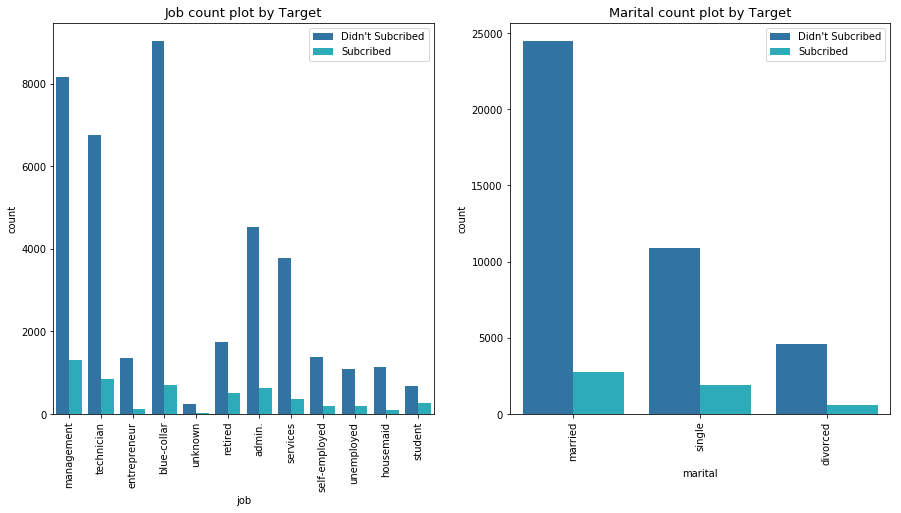

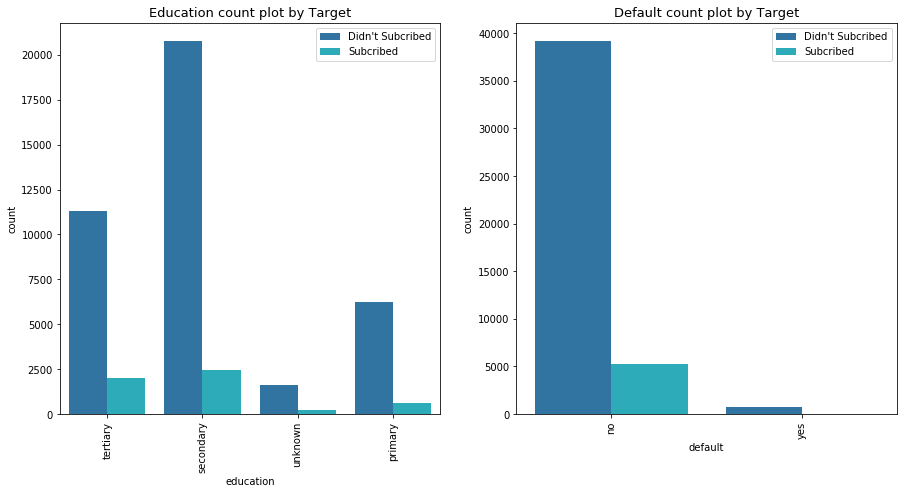

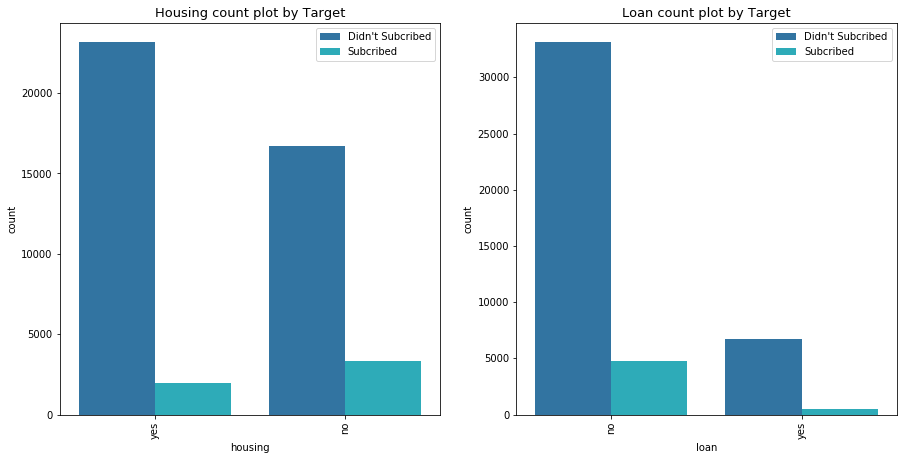

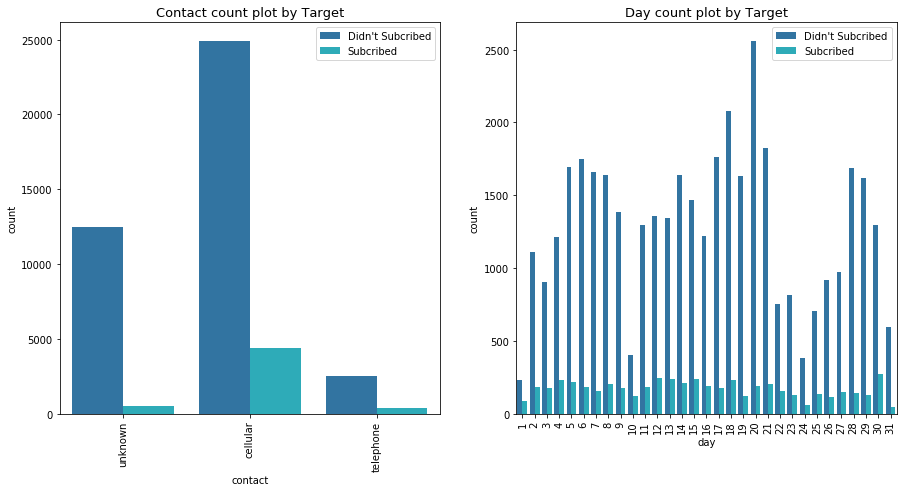

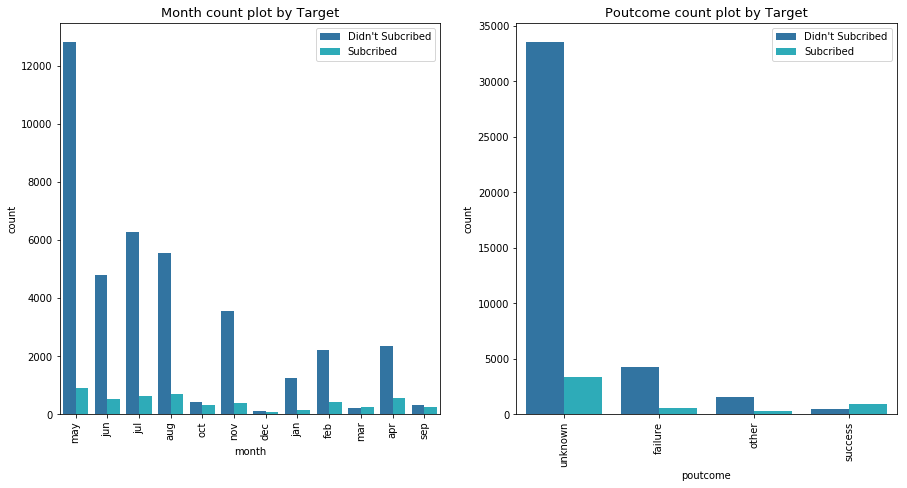

In [10]:
fn_count_plot(df_deposit, 'job', 'marital')
fn_count_plot(df_deposit, 'education', 'default')
fn_count_plot(df_deposit, 'housing', 'loan')
fn_count_plot(df_deposit, 'contact', 'day')
fn_count_plot(df_deposit, 'month', 'poutcome')

#### Observation -  Comments from categorical columns
* Management have a subscription rate of ~25 percent followed by technician.
* Married and single clients are more likely to subscribe then divorced clients
* Clients with education of secondary followed by tertiary are more likely to subscribe to term deposits
* Most of the clients don't have credit in default and their subscription rate is higher then people with default
* Cellular communication type have higher subscription rate
* Most of the subscription were made in May and August

### Check outlier and distribution for numerical columns and also plot it's relation with target variable

In [11]:
replaceStruct = {"Target":{"yes": 1, "no": 0,}}
df_deposit=df_deposit.replace(replaceStruct)

In [12]:
def fn_outlierdist_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm).set_title(f'Distribution of {col} with outliers')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm).set_title(f'Distribution of {col} without outliers')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()

def fn_target_plot(df, col, target = 'Target'):
    fig = plt.figure(figsize = (15, 7.2))
    # Distribution for 'Target' -- didn't subscribed, considering outliers   
    ax = fig.add_subplot(121)
    sns.distplot(df[(df[target] == 0)][col], color = 'c', 
                 ax = ax).set_title(f'{col.capitalize()} for Term Desposit - Didn\'t subscribed')

    # Distribution for 'Target' -- Subscribed, considering outliers
    ax= fig.add_subplot(122)
    sns.distplot(df[(df[target] == 1)][col], color = 'b', 
             ax = ax).set_title(f'{col.capitalize()} for Term Desposit - Subscribed')
    return plt.show()

def fn_numerical_val_distribution(df, col):
    # Outlier, distribution for 'age' column
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1

    print("Distribution for Column : "+ col)
    display(df.loc[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))].head())

    fn_outlierdist_plots(df, col)

    # Distribution of 'age' by 'Target'
    fn_target_plot(df, col)

Distribution for Column : age


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,0
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,0
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,unknown,0
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,unknown,0
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,1


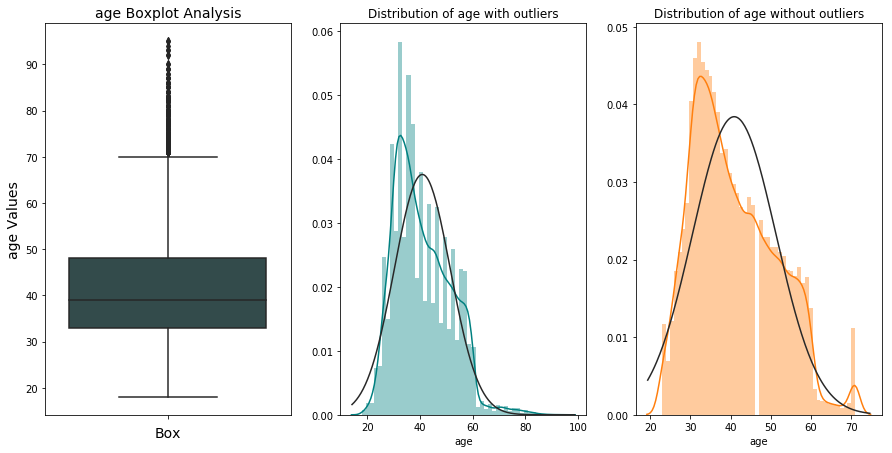

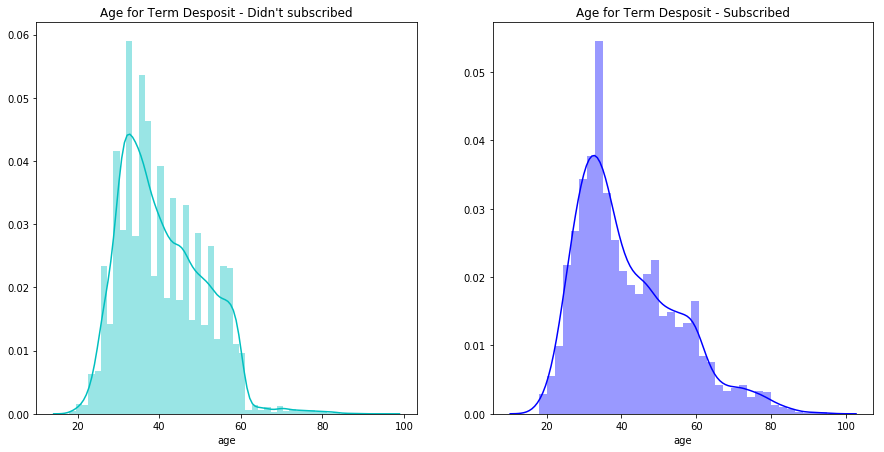

Distribution for Column : balance


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,0
65,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,0
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,0
70,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,0
186,40,services,divorced,unknown,no,4384,yes,no,unknown,5,may,315,1,-1,0,unknown,0


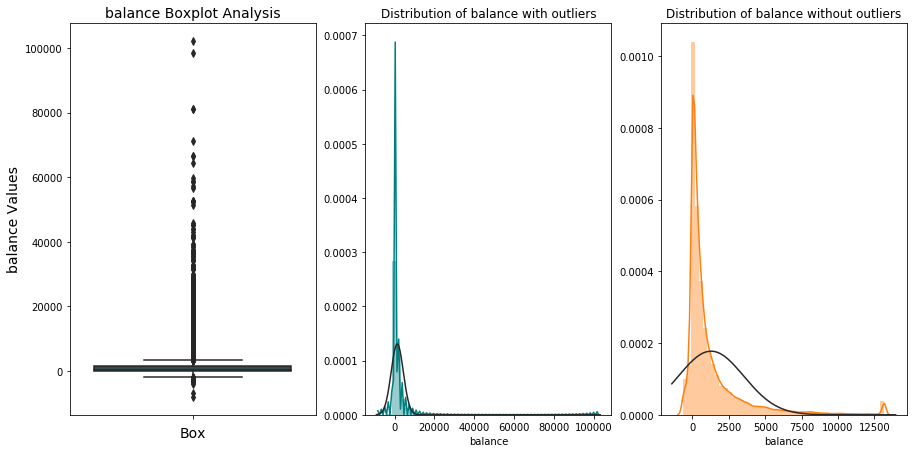

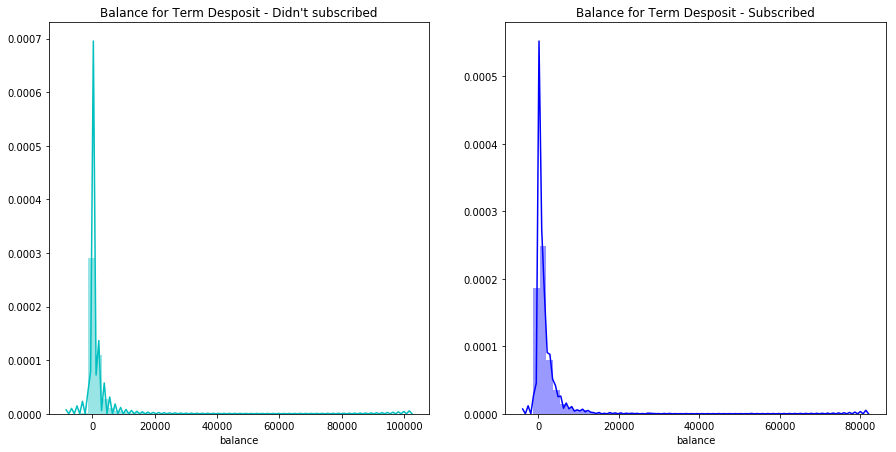

Distribution for Column : duration


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,0
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,0
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,0
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,0
61,53,technician,divorced,secondary,no,989,yes,no,unknown,5,may,812,1,-1,0,unknown,0


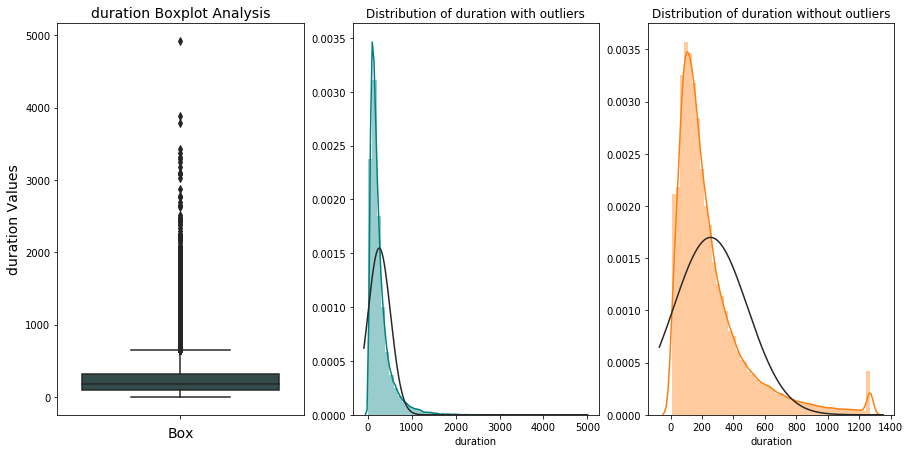

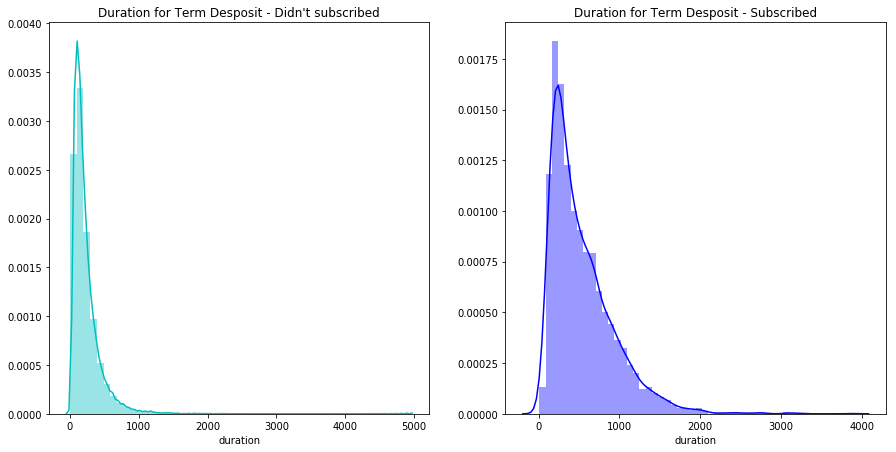

Distribution for Column : previous


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


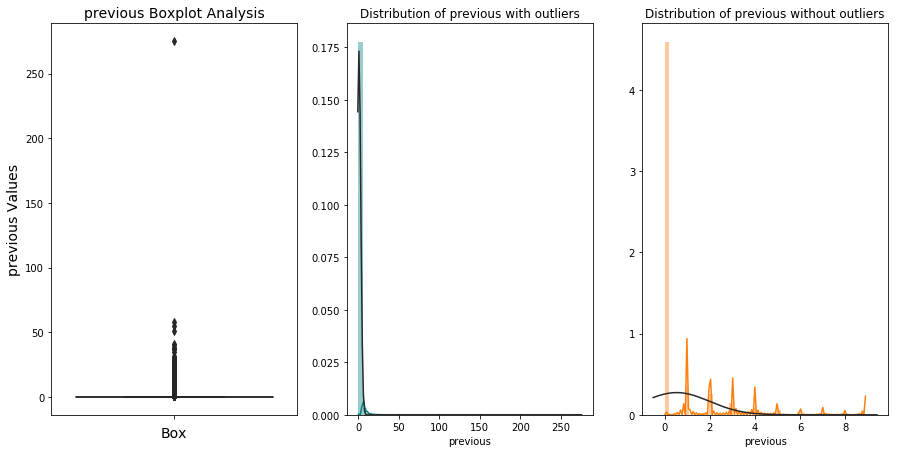

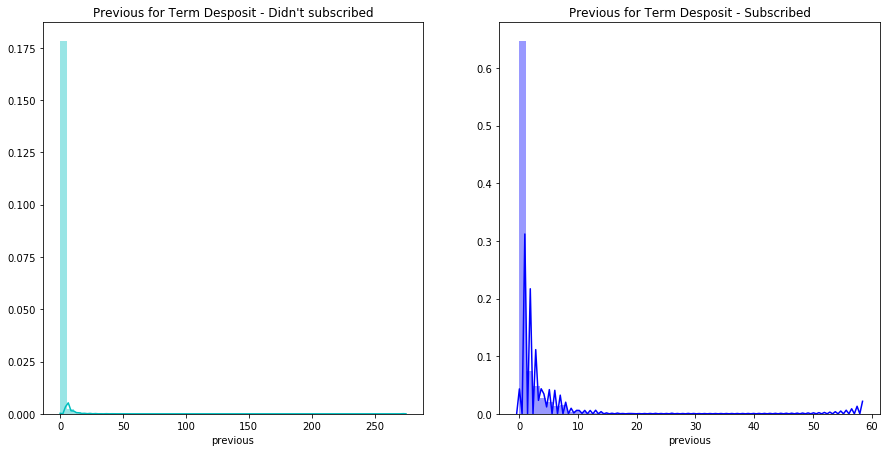

Distribution for Column : pdays


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


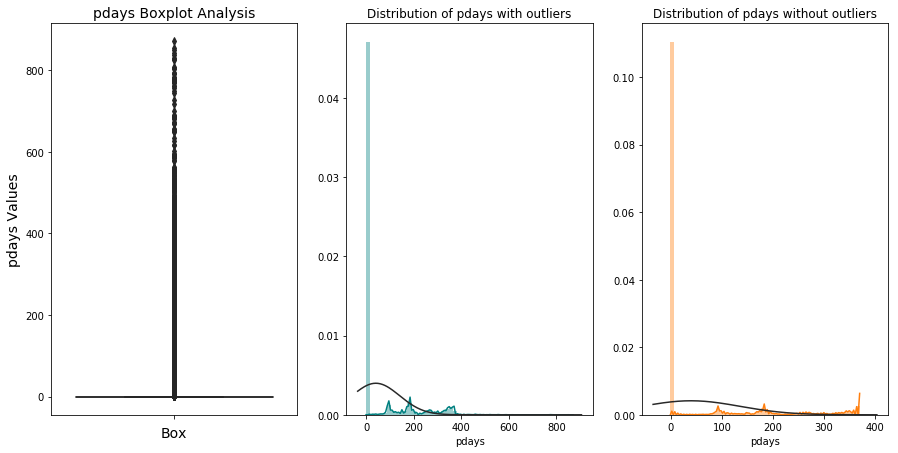

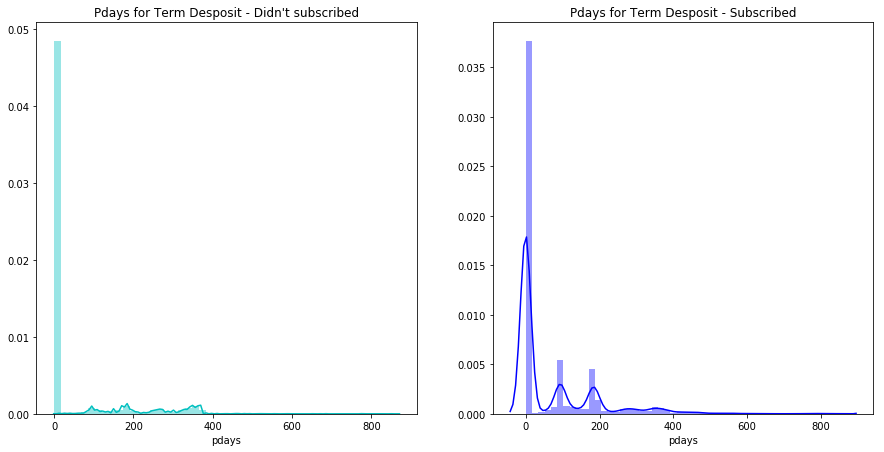

In [13]:
fn_numerical_val_distribution(df_deposit, 'age')
fn_numerical_val_distribution(df_deposit, 'balance')
fn_numerical_val_distribution(df_deposit, 'duration')
fn_numerical_val_distribution(df_deposit, 'previous')
fn_numerical_val_distribution(df_deposit, 'pdays')

#### Observation - Comments from numerical columns
* Used quantile method to check outliers in numerical column. It appears that there are outliers in each of the numerical columns.
* It appears that removing outliers below 25% percentile and above 75% percentile will bring the age and pdays columns to almost normal distribution.

### Multivariate visualization
Checking relationship between two or more variables. Includes correlation and scatterplot matrix, checking relation between two variables and Target.

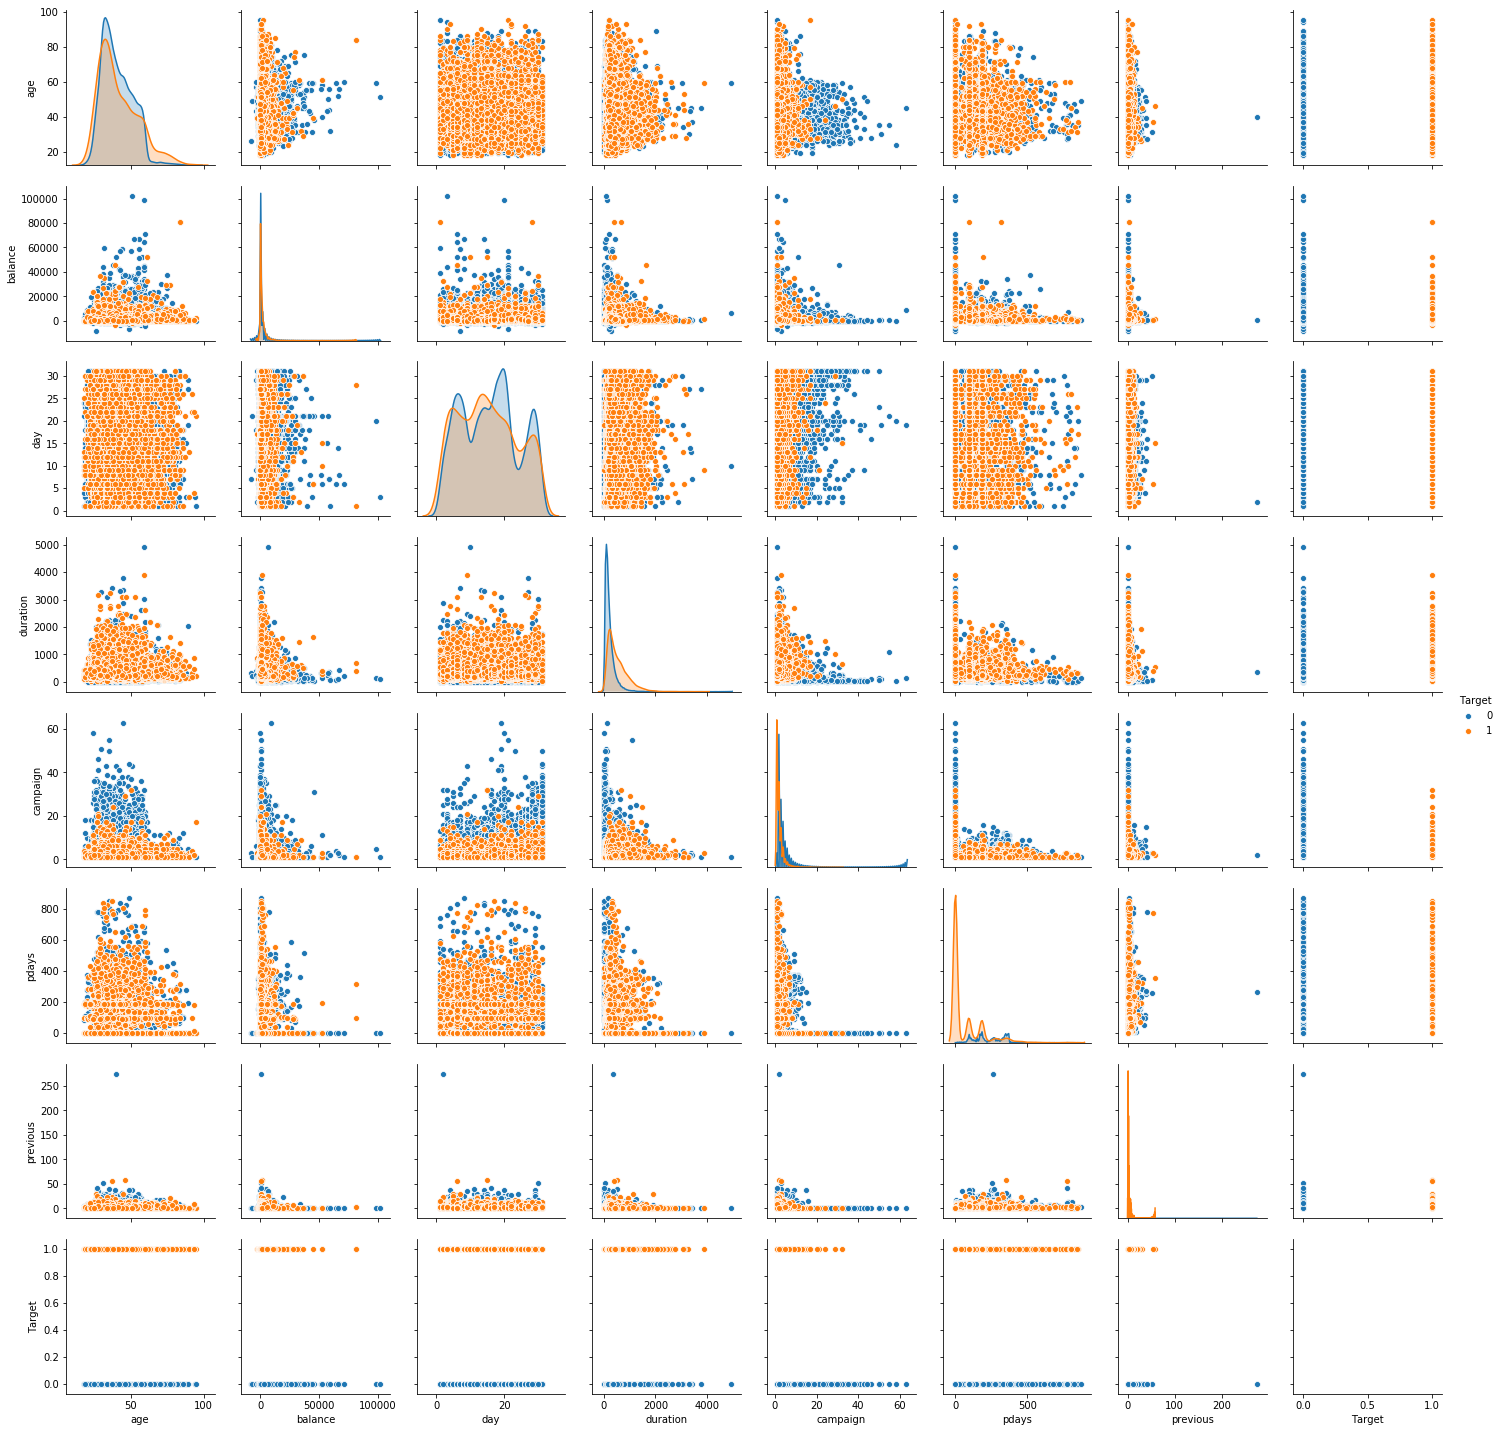

In [14]:
sns.pairplot(df_deposit[['age', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 
                           'duration', 'campaign', 'pdays', 'previous', 'Target']], hue = 'Target')

Text(0.5,1,'Correlation Matrix of Data')

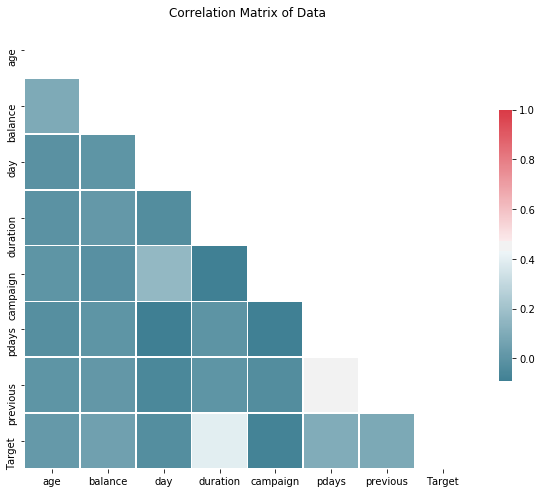

In [15]:
# Correlation matrix for all variables
corr = df_deposit.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (10, 10))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5})#, annot = True)
ax.set_title('Correlation Matrix of Data')

### Pre Processing

In [16]:
oneHotCols=['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [17]:
df_deposit=pd.get_dummies(df_deposit, columns=oneHotCols)
df_deposit.head(10)

,age,balance,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,42,2,5,380,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,58,121,5,50,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,43,593,5,55,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Data Split 70:30 Ratio

In [18]:
X = df_deposit.drop("Target" , axis=1)
y = df_deposit.pop("Target")

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

### Modelling

In [20]:
def fn_print_model_result(model,model_name, X_test, y_true):
    y_pred = model.predict(X_test)
    cm = m.confusion_matrix(y_true, y_pred, labels=[0,1])
    accuracy = m.accuracy_score(y_true, y_pred).round(2)
    precision = m.precision_score(y_true, y_pred).round(2)
    recall = m.recall_score(y_true, y_pred).round(2)
    f1 = m.f1_score(y_true, y_pred).round(2)
    roc_auc = m.roc_auc_score(y_true, y_pred).round(2)
    train_score = model.score(X_train, y_train).round(2)
    test_score = model.score(X_test, y_true).round(2)
    print('Model Name       :'+model_name)
    print('Training Score   %0.2f' % train_score)
    print('Testing Score    %0.2f' % test_score)
    print('Accuracy         %0.2f' % accuracy)
    print('precision        %0.2f' % precision)
    print('recall           %0.2f' % recall)
    print('f1 Score         %0.2f' % f1)
    print('AUC              %0.2f' % roc_auc)
    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                      columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    
    df = pd.DataFrame([model_name, train_score, test_score, accuracy, precision, recall, f1, roc_auc]).T
    df.columns=['Model', 'Training Score', 'Testing Score', 'Accuracy','Precision','Recall', 'F1-Score', 'AUC-Score']
    return df

df_result = pd.DataFrame()

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

Model Name       :Logistic Regression
Training Score   0.89
Testing Score    0.89
Accuracy         0.89
precision        0.57
recall           0.21
f1 Score         0.31
AUC              0.59


,Model,Training Score,Testing Score,Accuracy,Precision,Recall,F1-Score,AUC-Score
0,Logistic Regression,0.89,0.89,0.89,0.57,0.21,0.31,0.59


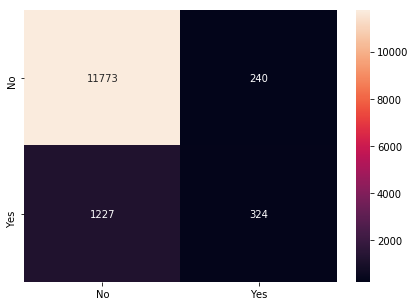

In [22]:
df = fn_print_model_result(logmodel,'Logistic Regression', X_test, y_test)
df_result = df_result.append(df)
df_result

###  Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Model Name       :Decision Tree
Training Score   1.00
Testing Score    0.88
Accuracy         0.88
precision        0.46
recall           0.49
f1 Score         0.48
AUC              0.71


,Model,Training Score,Testing Score,Accuracy,Precision,Recall,F1-Score,AUC-Score
0,Logistic Regression,0.89,0.89,0.89,0.57,0.21,0.31,0.59
0,Decision Tree,1,0.88,0.88,0.46,0.49,0.48,0.71


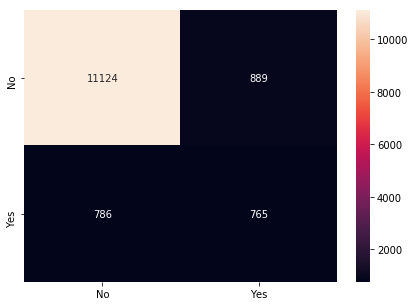

In [24]:
df = fn_print_model_result(dTree,'Decision Tree', X_test, y_test)
df_result = df_result.append(df)
df_result

### Ensemble Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

Model Name       : Random Forest
Training Score   1.00
Testing Score    0.91
Accuracy         0.91
precision        0.64
recall           0.45
f1 Score         0.53
AUC              0.71


,Model,Training Score,Testing Score,Accuracy,Precision,Recall,F1-Score,AUC-Score
0,Logistic Regression,0.89,0.89,0.89,0.57,0.21,0.31,0.59
0,Decision Tree,1,0.88,0.88,0.46,0.49,0.48,0.71
0,Random Forest,1,0.91,0.91,0.64,0.45,0.53,0.71


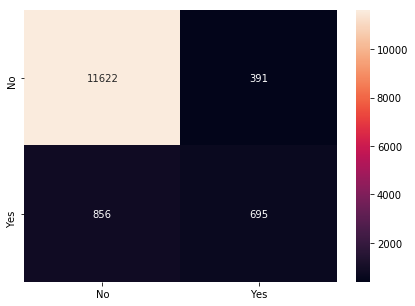

In [26]:
df = fn_print_model_result(rfcl,' Random Forest', X_test, y_test)
df_result = df_result.append(df)
df_result

### Ensemble Learning - Bagging

In [27]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

Model Name       :Bagging
Training Score   1.00
Testing Score    0.91
Accuracy         0.91
precision        0.62
recall           0.50
f1 Score         0.56
AUC              0.73


,Model,Training Score,Testing Score,Accuracy,Precision,Recall,F1-Score,AUC-Score
0,Logistic Regression,0.89,0.89,0.89,0.57,0.21,0.31,0.59
0,Decision Tree,1,0.88,0.88,0.46,0.49,0.48,0.71
0,Random Forest,1,0.91,0.91,0.64,0.45,0.53,0.71
0,Bagging,1,0.91,0.91,0.62,0.5,0.56,0.73


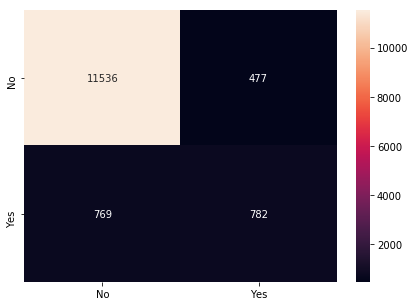

In [28]:
df = fn_print_model_result(bgcl,'Bagging', X_test, y_test)
df_result = df_result.append(df)
df_result

### Ensemble Learning - AdaBoosting

In [29]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

Model Name       :AdaBoosting
Training Score   0.90
Testing Score    0.89
Accuracy         0.89
precision        0.57
recall           0.34
f1 Score         0.43
AUC              0.66


,Model,Training Score,Testing Score,Accuracy,Precision,Recall,F1-Score,AUC-Score
0,Logistic Regression,0.89,0.89,0.89,0.57,0.21,0.31,0.59
0,Decision Tree,1,0.88,0.88,0.46,0.49,0.48,0.71
0,Random Forest,1,0.91,0.91,0.64,0.45,0.53,0.71
0,Bagging,1,0.91,0.91,0.62,0.5,0.56,0.73
0,AdaBoosting,0.9,0.89,0.89,0.57,0.34,0.43,0.66


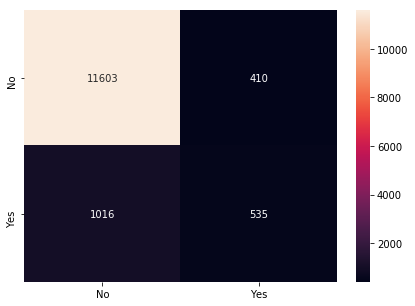

In [30]:
df = fn_print_model_result(abcl,'AdaBoosting', X_test, y_test)
df_result = df_result.append(df)
df_result

### Ensemble Learning - GradientBoost

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

Model Name       :GradientBoost
Training Score   0.91
Testing Score    0.91
Accuracy         0.91
precision        0.65
recall           0.36
f1 Score         0.46
AUC              0.67


,Model,Training Score,Testing Score,Accuracy,Precision,Recall,F1-Score,AUC-Score
0,Logistic Regression,0.89,0.89,0.89,0.57,0.21,0.31,0.59
0,Decision Tree,1,0.88,0.88,0.46,0.49,0.48,0.71
0,Random Forest,1,0.91,0.91,0.64,0.45,0.53,0.71
0,Bagging,1,0.91,0.91,0.62,0.5,0.56,0.73
0,AdaBoosting,0.9,0.89,0.89,0.57,0.34,0.43,0.66
0,GradientBoost,0.91,0.91,0.91,0.65,0.36,0.46,0.67


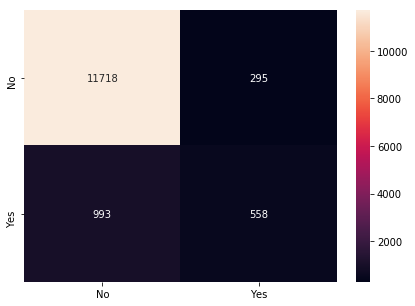

In [32]:
df = fn_print_model_result(gbcl,'GradientBoost', X_test, y_test)
df_result = df_result.append(df)
df_result

### Comparing model results

In [33]:
df_result

,Model,Training Score,Testing Score,Accuracy,Precision,Recall,F1-Score,AUC-Score
0,Logistic Regression,0.89,0.89,0.89,0.57,0.21,0.31,0.59
0,Decision Tree,1,0.88,0.88,0.46,0.49,0.48,0.71
0,Random Forest,1,0.91,0.91,0.64,0.45,0.53,0.71
0,Bagging,1,0.91,0.91,0.62,0.5,0.56,0.73
0,AdaBoosting,0.9,0.89,0.89,0.57,0.34,0.43,0.66
0,GradientBoost,0.91,0.91,0.91,0.65,0.36,0.46,0.67


### Conclusion
* Bagging with decission tree givs us best result in term of AUC, accuracy, recall and f1-score.